# Quant Data Analysis

### Import Libraries and Get the Data

In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

sns.set()

**Get the Data**

In [2]:
df = pd.read_csv("E:/Datasets/quant_data.csv", parse_dates = True, index_col=['datetime'])

In [3]:
df.head()

open     high      low    close       volume       reserve  \
datetime                                                                    
2020-07-16  9190.80  9216.02  9005.00  9130.11  8765.698589  2.889262e+06   
2020-07-17  9130.93  9182.99  9054.99  9154.29  6423.747162  2.889943e+06   
2020-07-18  9154.29  9210.00  9122.65  9175.85  4121.626974  2.890642e+06   
2020-07-19  9175.83  9245.03  9105.37  9212.87  3520.072476  2.892067e+06   
2020-07-20  9214.01  9223.51  9131.00  9161.05  5815.330842  2.891858e+06   

            funding_rates      mvrv          nrpl      nupl  \
datetime                                                      
2020-07-16       0.009332  1.563972 -3.694023e+06  0.360602   
2020-07-17       0.007262  1.568555  3.367513e+05  0.362471   
2020-07-18       0.004125  1.572507  7.637219e+06  0.364073   
2020-07-19       0.007809  1.579355  2.053120e+07  0.366830   
2020-07-20       0.010244  1.568483  7.103351e+06  0.362441   

            stock_to_flow_reversion  sth_sopr signal        RSI        9_ema  \
datetime                                                                       
2020-07-16                 0.421011  0.997131   none  47.108800  9214.535081   
2020-07-17                 0.366354  0.999726   none  48.843088  9202.486065   
2020-07-18                 0.404649  1.000724    buy  50.404638  9197.158852   
2020-07-19                 0.409607  1.000859   none  53.054470  9200.301081   
2020-07-20                 0.437860  1.000647   none  49.099864  9192.450865   

                 21_ema       50_ema      200_ema  Fear_and_Greed_Index  
datetime                                                                 
2020-07-16  9196.119258  9524.945856  9671.528810                    43  
2020-07-17  9206.292278  9560.413230  9718.271795                    41  
2020-07-18  9216.465298  9595.880603  9765.014781                    44  
2020-07-19  9226.638318  9631.347977  9811.757766                    41  
2020-07-20  9236.811338  9666.815351  9858.500751                    44

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 935 entries, 2020-07-16 to 2023-02-05
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   open                     935 non-null    float64
 1   high                     935 non-null    float64
 2   low                      935 non-null    float64
 3   close                    935 non-null    float64
 4   volume                   935 non-null    float64
 5   reserve                  935 non-null    float64
 6   funding_rates            935 non-null    float64
 7   mvrv                     935 non-null    float64
 8   nrpl                     935 non-null    float64
 9   nupl                     935 non-null    float64
 10  stock_to_flow_reversion  935 non-null    float64
 11  sth_sopr                 935 non-null    float64
 12  signal                   935 non-null    object 
 13  RSI                      935 non-null    float64
 14  9_ema  

In [5]:
df.describe()

open          high           low         close         volume  \
count    935.000000    935.000000    935.000000    935.000000     935.000000   
mean   32854.990235  33748.030417  31841.441326  32869.649166   19776.787469   
std    15586.619424  16026.828089  15051.951866  15570.876889   12739.460780   
min     9130.930000   9182.990000   9005.000000   9130.110000    3211.704593   
25%    19239.850000  19554.870000  18850.245000  19258.600000   11166.544857   
50%    33077.430000  34231.540000  31432.190000  33080.660000   16961.108288   
75%    45709.475000  47058.655000  44145.240000  45705.135000   24086.969086   
max    67554.130000  69000.000000  66261.790000  67554.840000  119633.961941   

            reserve  funding_rates        mvrv          nrpl        nupl  \
count  9.350000e+02     935.000000  935.000000  9.350000e+02  935.000000   
mean   2.655477e+06       0.010833    1.887077  2.638039e+08    0.364061   
std    1.542206e+05       0.023959    0.773880  9.690276e+08    0.282549   
min    2.214551e+06      -0.116700    0.759394 -4.302549e+09   -0.316839   
25%    2.596823e+06      -0.000010    1.172578 -1.718159e+08    0.147169   
50%    2.689092e+06       0.005040    1.806507  6.615847e+07    0.446445   
75%    2.753680e+06       0.012384    2.382392  4.871924e+08    0.580254   
max    2.947289e+06       0.154037    3.981206  5.863688e+09    0.748820   

       stock_to_flow_reversion    sth_sopr         RSI         9_ema  \
count               935.000000  935.000000  935.000000    935.000000   
mean                  1.587759    1.005996   52.406224  32810.048490   
std                   0.797501    0.031463   14.396264  15497.199601   
min                   0.366354    0.866222   20.285894   9192.450865   
25%                   0.905744    0.989412   41.382874  19322.981514   
50%                   1.483322    1.000418   50.496180  33560.442757   
75%                   2.219189    1.018265   61.468009  45330.585351   
max                   3.805708    1.193530   89.347312  64490.167763   

             21_ema        50_ema       200_ema  Fear_and_Greed_Index  
count    935.000000    935.000000    935.000000            935.000000  
mean   32729.191448  32582.628701  32110.411317             45.706952  
std    15382.324826  14982.202215  12293.601467             25.749944  
min     9196.119258   9524.945856   9671.528810              6.000000  
25%    19417.071530  19207.403858  21255.649974             24.000000  
50%    33620.120486  34805.448787  34449.423397             39.000000  
75%    44958.719425  44505.259597  42075.874387             72.000000  
max    63062.412439  59135.220214  50120.543237             95.000000

In [6]:
#sort rows by (index) date
df.sort_index(inplace=True)

### EDA

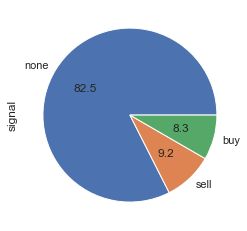

In [7]:
#view distribution of target variables
df.signal.value_counts().plot(kind='pie',autopct='%.1f')

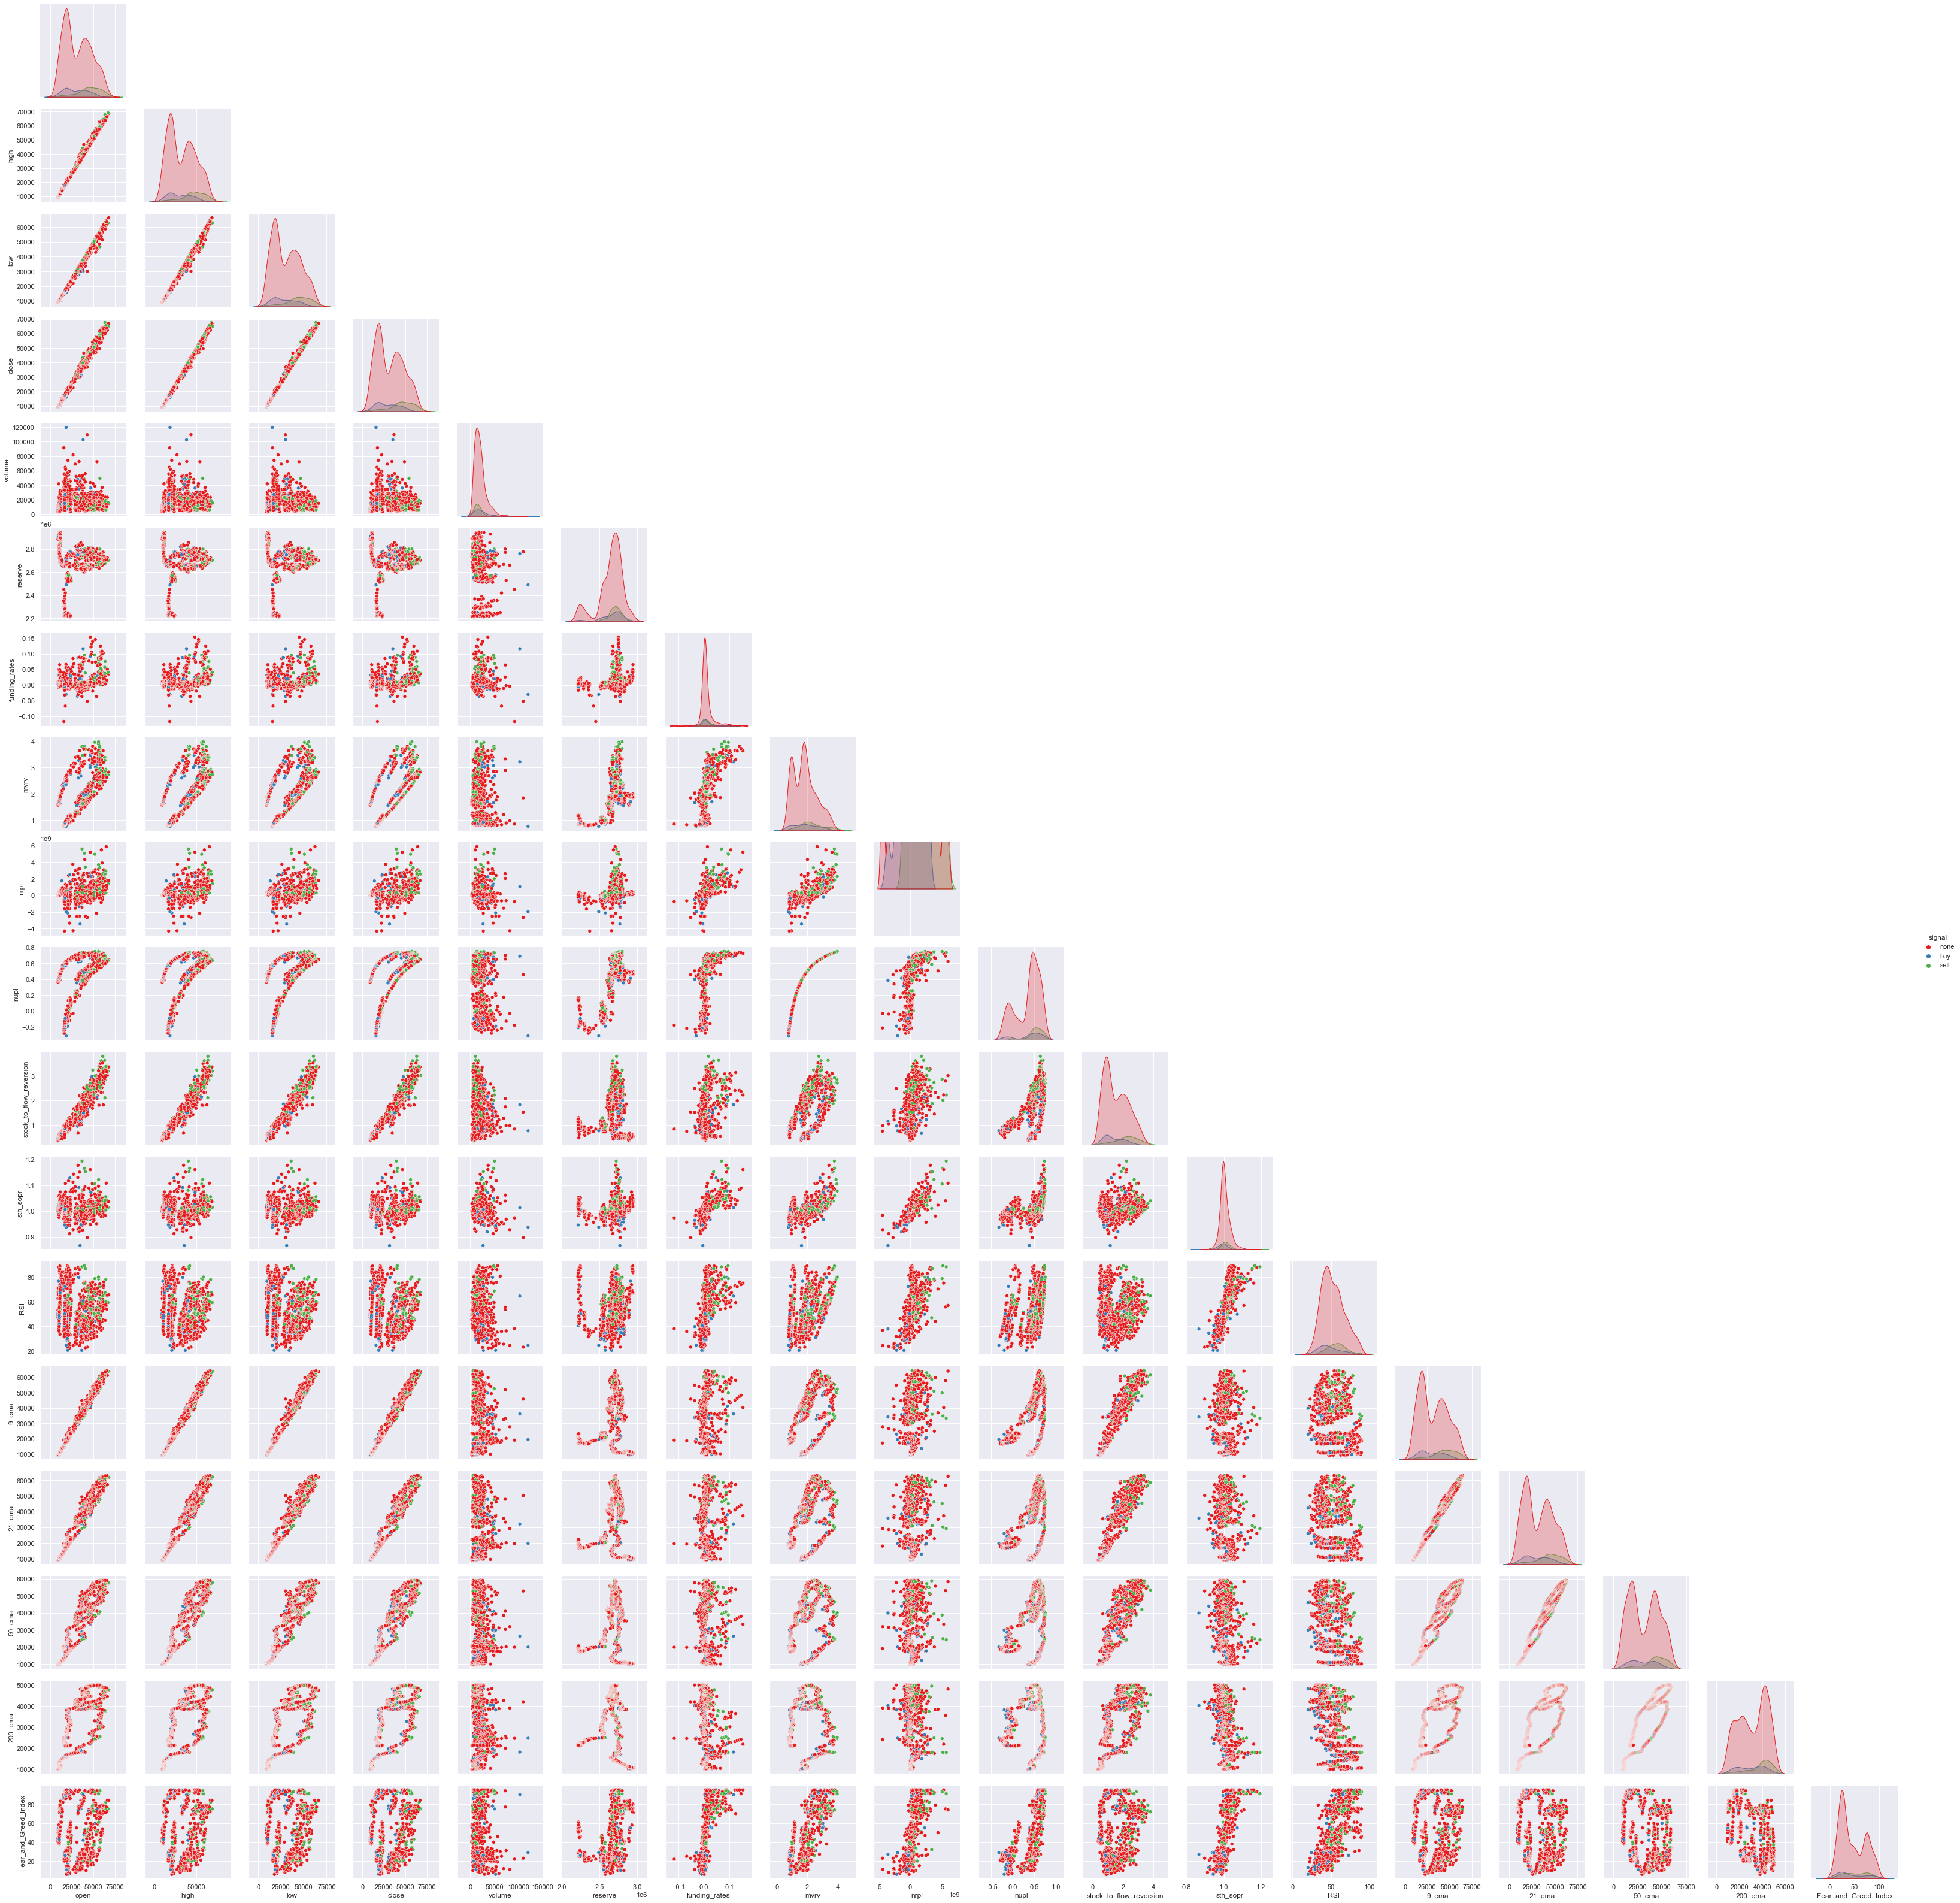

In [8]:
#view feature interactions w.r.t. target variable
sns.pairplot(df, corner=True, hue='signal', palette='Set1')

In [9]:
#label encode the target feature
df['signal'] = df['signal'].map({'none':0,'buy':1,'sell':2})

**Correlation Matrix**

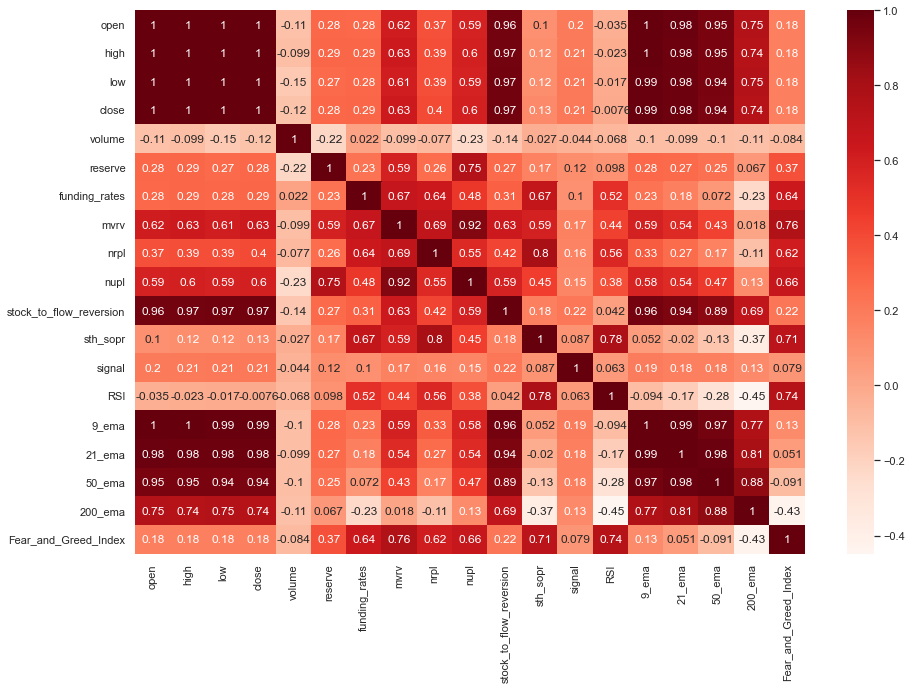

In [10]:
#correlation matrix for whole data
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="Reds", annot=True)

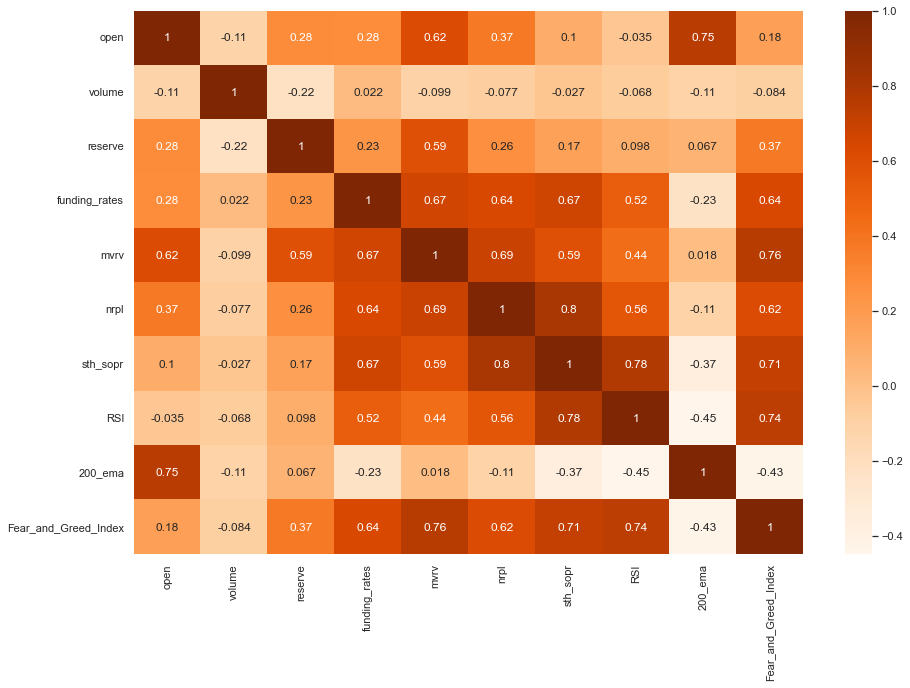

In [11]:
#correlation matrix on dropping the multicollinear features
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['high','low','close','stock_to_flow_reversion','9_ema','21_ema','50_ema','nupl','signal'], axis=1).corr(), 
            cmap="Oranges", annot=True)

**Consolidated Data Distributions**

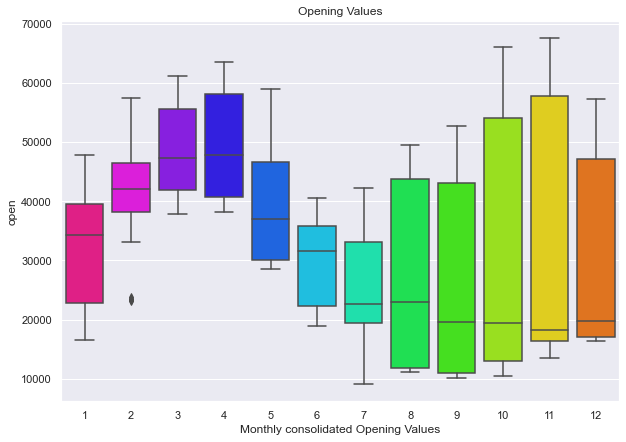

In [12]:
#monthly consolidated opening values
plt.subplots(figsize=(10, 7))
sns.boxplot(data=df, x=df.index.month, y='open', palette='hsv_r')
plt.title('Opening Values')
plt.xlabel('Monthly consolidated Opening Values');

In [13]:
#unique years in the dataset
pd.DatetimeIndex(df.index).year.unique()

Int64Index([2020, 2021, 2022, 2023], dtype='int64', name='datetime')

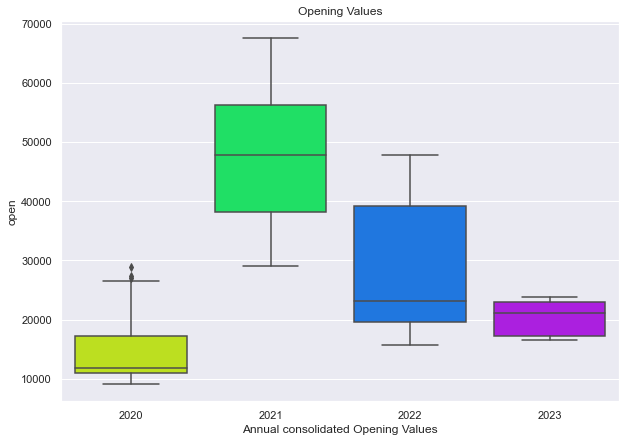

In [14]:
#yearly consolidated opening values 
plt.subplots(figsize=(10, 7))
sns.boxplot(data=df, x=df.index.year, y='open',palette='hsv')
plt.title('Opening Values')
plt.xlabel('Annual consolidated Opening Values');

**Regression Plot**

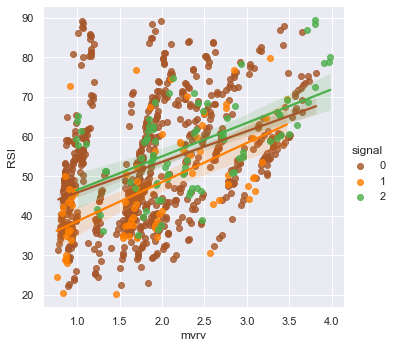

In [15]:
sns.lmplot(data=df, y='RSI', x='mvrv',hue='signal',palette='Set1_r')

**Monthly Resampling**

In [16]:
df_monthly = df[['RSI','mvrv','open','close','high','low']].resample('M').median()
df_monthly['close-open'] = df_monthly['close']-df_monthly['open']
df_monthly['high-low'] = df_monthly['high']-df_monthly['low']
df_monthly.head()

RSI      mvrv       open      close       high        low  \
datetime                                                                      
2020-07-31  69.417802  1.637471   9543.705   9582.225   9665.775   9462.870   
2020-08-31  62.454486  1.907107  11688.250  11688.480  11818.180  11463.870   
2020-09-30  47.899163  1.715581  10684.470  10685.240  10801.095  10315.595   
2020-10-31  63.751763  1.823498  11428.220  11509.340  11561.450  11290.830   
2020-11-30  74.976156  2.351798  16325.185  16533.100  16691.960  15927.000   

            close-open  high-low  
datetime                          
2020-07-31      38.520   202.905  
2020-08-31       0.230   354.310  
2020-09-30       0.770   485.500  
2020-10-31      81.120   270.620  
2020-11-30     207.915   764.960

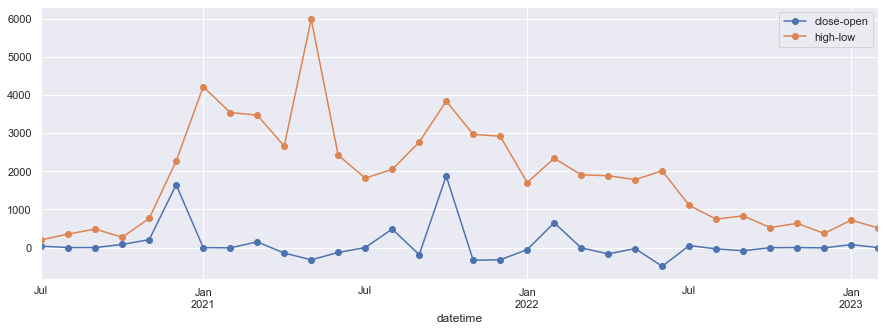

In [17]:
plt.figure(figsize=(15,5))
df_monthly['close-open'].plot(marker='o');
df_monthly['high-low'].plot(marker='o');
plt.legend()

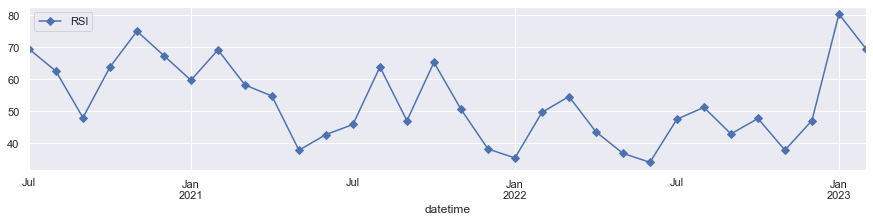

In [18]:
plt.figure(figsize=(15,3))
df_monthly['RSI'].plot(marker='D');
plt.legend()

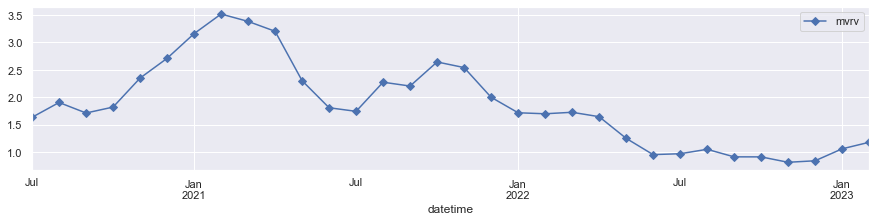

In [19]:
plt.figure(figsize=(15,3))
df_monthly['mvrv'].plot(marker='D');
plt.legend()

**Rolling Mean**

In [20]:
#method to calculate rolling mean and plot the results
def plotRollingMean(data, size):
    rolling_mean = data.rolling(size).mean()

    plt.figure(figsize=(15,5))
    plt.plot(data[size:], label="Original Values",  color='royalblue')
    plt.plot(rolling_mean,  label="Rolling Mean", color='darkmagenta')             
    plt.legend(loc="upper left")
    plt.xlabel('Date')
    plt.ylabel('Number of Orders')
    plt.title('Original Data w/ Rolling Mean\n Size: {} days'.format(size))

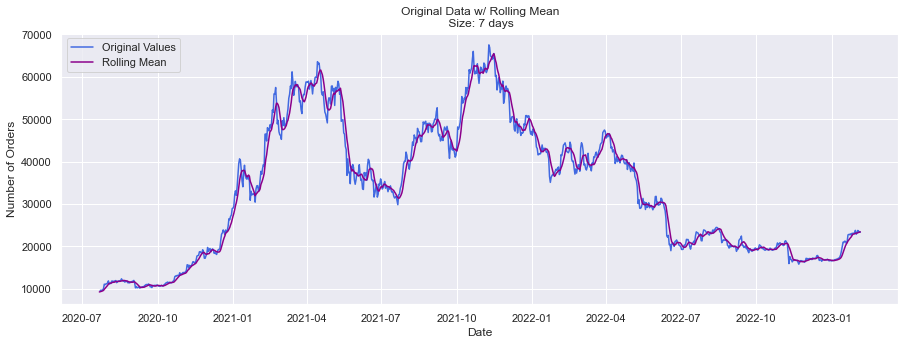

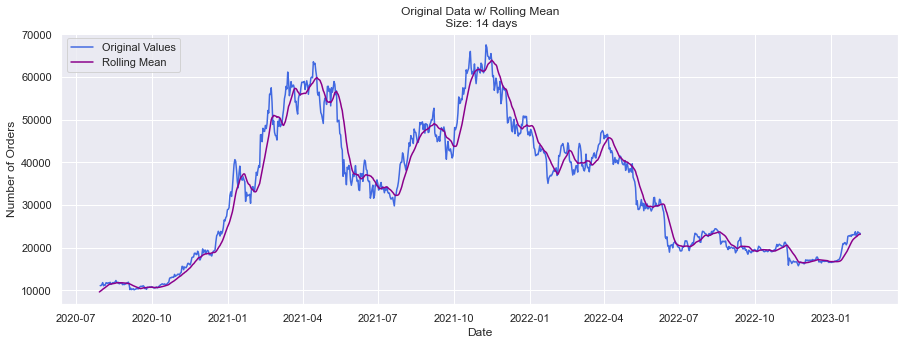

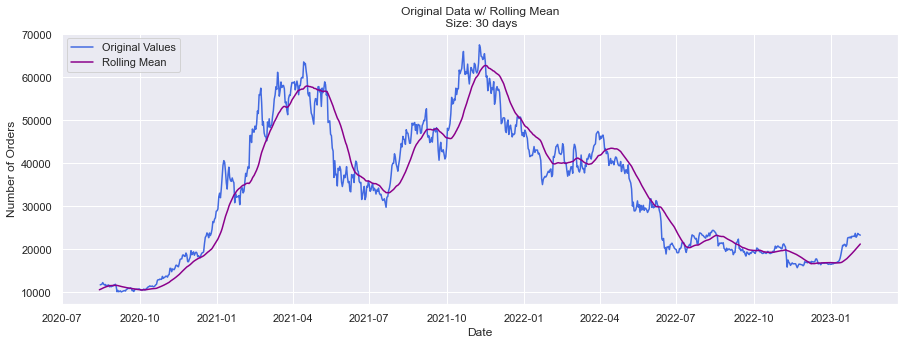

In [21]:
plotRollingMean(df['open'], 7) #1 week
plotRollingMean(df['open'], 14) #1 fortnight
plotRollingMean(df['open'], 30) #1 month

**Autocorrelation Plots**

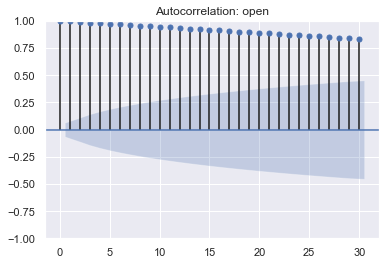

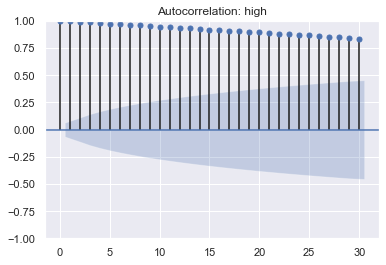

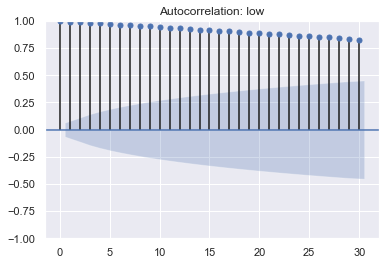

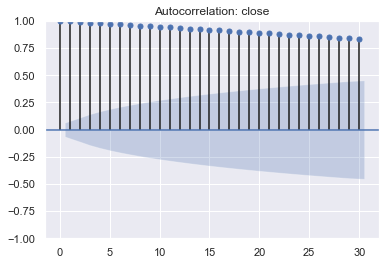

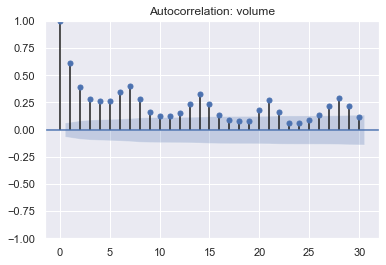

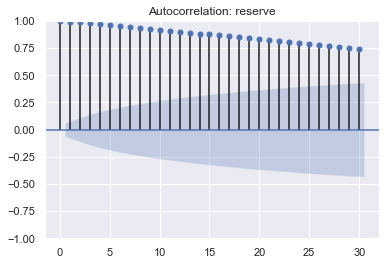

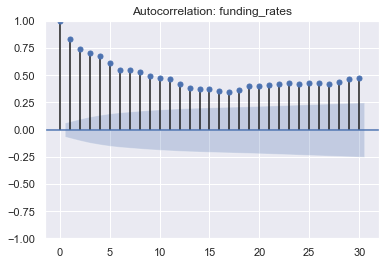

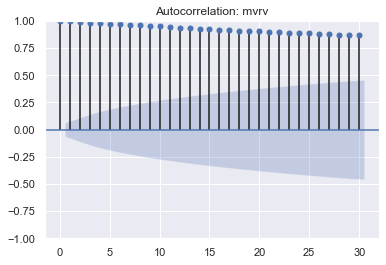

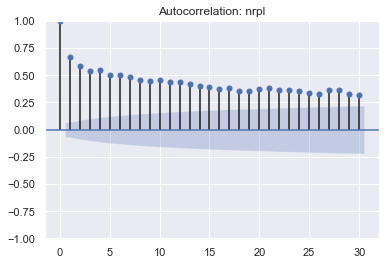

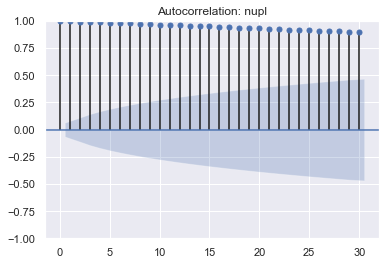

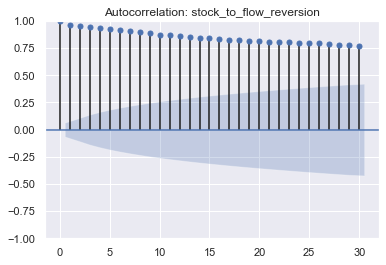

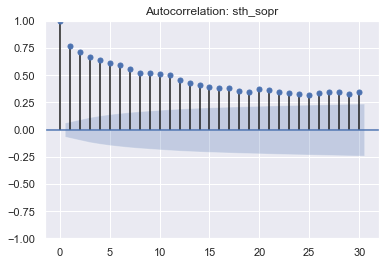

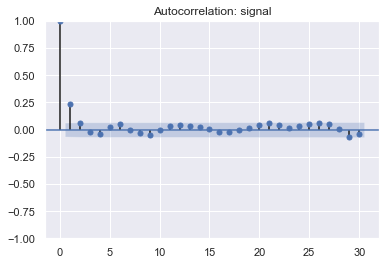

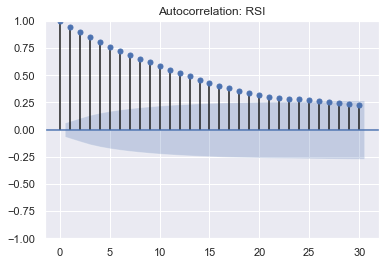

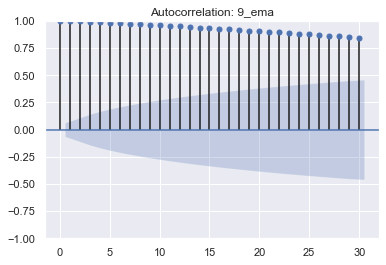

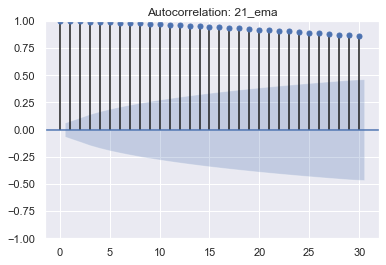

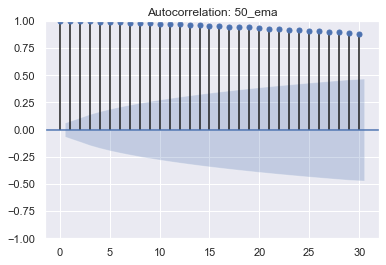

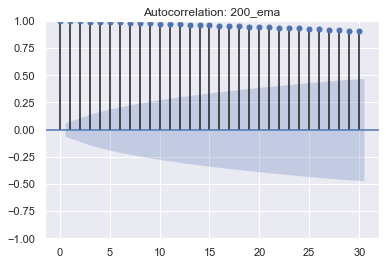

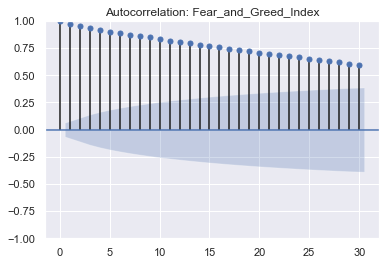

In [22]:
for col in df.columns:
    ax = plot_acf(df[col])
    plt.title('Autocorrelation: {}'.format(col))
    plt.show()

In [23]:
# for col in df.columns:
#     ax = plot_pacf(df[col])
#     plt.title('Partial Autocorrelation: {}'.format(col))
#     plt.show()

### Feature Engineering

**Create Features for Month, Day and Day of the Week**

In [24]:
df['dayofweek'] = df.index.dayofweek
df['day'] = df.index.day
df['month'] = df.index.month

**Reduce Features by Dropping Multicollinear Features**

In [25]:
df.drop(['high','low','close','stock_to_flow_reversion','9_ema','21_ema','50_ema','nupl'], axis=1, inplace=True)

**Generate Rolling Means for Last 10 values**

In [26]:
for col in df.drop('signal', axis=1).columns:
    col_name = 'rolling_mean_'+col
    df[col_name] = df[col].shift().rolling(10).mean()

**Generate Lag values for Last 5 Lags**

In [27]:
for col in df.drop('signal', axis=1).columns:
    for lag in range(1, 6):
        df['{}_lag_{}'.format(col,lag)] = df[col].shift(lag)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 935 entries, 2020-07-16 to 2023-02-05
Columns: 157 entries, open to rolling_mean_month_lag_5
dtypes: float64(152), int64(5)
memory usage: 1.2 MB


**Drop Rows with Null Values**

In [29]:
df.dropna(inplace=True)

### Modelling
**Split Data into Training and Testing Data**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("signal", axis=1), df["signal"],
                                                    test_size=0.2, random_state=100, stratify=df["signal"])

In [31]:
def evaluate_models(test, pred, model_name):
    print("-----Results for {} model-----".format(model_name))
    print('Accuracy : ',accuracy_score(test, pred))
    print('Classification Report : \n', classification_report(test, pred))
    print('Confusion Matrix : \n')
    sns.heatmap(confusion_matrix(test, pred), annot=True)

**Logistic Regression**

In [32]:
logr = LogisticRegression(random_state=11, penalty='l1',solver='saga', tol=0.01)
logr.fit(X_train,y_train)

logr_predicted = logr.predict(X_test)

**Decision Tree Classifier**

In [33]:
dtree = DecisionTreeClassifier(random_state=11, criterion='entropy')
dtree.fit(X_train, y_train)

dtree_predicted = dtree.predict(X_test)

**Random Forest Classifier**

In [34]:
clf = RandomForestClassifier(random_state=11, criterion='entropy')
clf.fit(X_train,y_train)

clf_predicted = clf.predict(X_test)

### Evaluation and Results

-----Results for Logistic Regression model-----
Accuracy :  0.5543478260869565
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.57      0.68       152
           1       0.22      0.53      0.31        15
           2       0.17      0.47      0.25        17

    accuracy                           0.55       184
   macro avg       0.42      0.52      0.41       184
weighted avg       0.74      0.55      0.61       184

Confusion Matrix : 



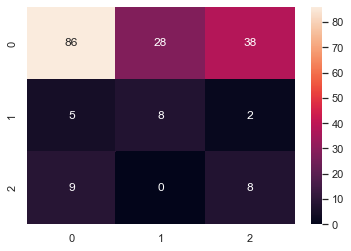

In [35]:
evaluate_models(y_test, logr_predicted, "Logistic Regression")

-----Results for Decision Tree Classifier model-----
Accuracy :  0.7336956521739131
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       152
           1       0.28      0.33      0.30        15
           2       0.21      0.24      0.22        17

    accuracy                           0.73       184
   macro avg       0.45      0.47      0.46       184
weighted avg       0.75      0.73      0.74       184

Confusion Matrix : 



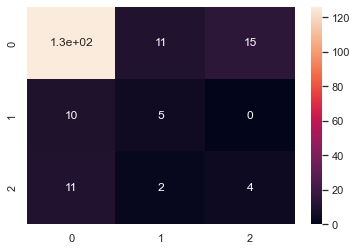

In [36]:
evaluate_models(y_test, dtree_predicted, "Decision Tree Classifier")

-----Results for Random Forest Classifier model-----
Accuracy :  0.8260869565217391
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       152
           1       1.00      0.07      0.12        15
           2       0.33      0.06      0.10        17

    accuracy                           0.83       184
   macro avg       0.72      0.37      0.38       184
weighted avg       0.80      0.83      0.77       184

Confusion Matrix : 



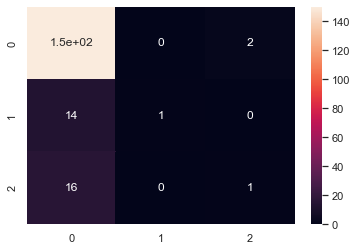

In [37]:
evaluate_models(y_test, clf_predicted, "Random Forest Classifier")

**Get Feature Importance**

In [38]:
feature_imp = pd.Series(clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)

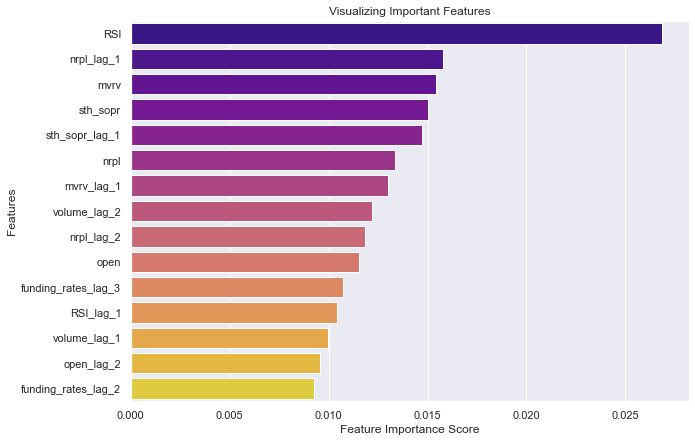

In [39]:
fig,axs=plt.subplots(figsize=(10,7))
sns.barplot(x=feature_imp[:15], y=feature_imp.index[:15], palette='plasma')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()